<a href="https://colab.research.google.com/github/Arsat-1/Arsat-1/blob/main/Infolytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span>Importación de Librerias<span>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
from google.colab import files
uploaded = files.upload()

<span>Importación del Dataset<span><br/>
    <small>Display de las primeras 5 filas<small>

In [3]:
customer_churn = pd.read_csv("Dataset_ejercicio.csv")
customer_churn.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Información del Data Frame

In [4]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7042 non-null   float64
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     6043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


<span>Tipos de dato por columna<span>

In [5]:
customer_churn.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<span>Valores unicos por columna<span>

In [6]:
for col in customer_churn:
    print(col)
    print(customer_churn[col].unique())

Unnamed: 0
[   0    1    2 ... 7040 7041 7042]
customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26.  0.
 39. nan]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes' nan]
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two y

Cantidad de Casos por Valor

In [7]:
for col in customer_churn:
    print(customer_churn[col].value_counts())

2047    1
5368    1
1242    1
3291    1
5344    1
       ..
4687    1
2644    1
597     1
6742    1
0       1
Name: Unnamed: 0, Length: 7043, dtype: int64
7682-AZNDK    1
5671-RQRLP    1
4291-SHSBH    1
4547-FZJWE    1
3374-LXDEV    1
             ..
7554-NEWDD    1
3026-ATZYV    1
8096-LOIST    1
6038-GCYEC    1
9643-AVVWI    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1.0     613
72.0    362
2.0     237
3.0     200
4.0     176
       ... 
28.0     57
39.0     56
44.0     51
36.0     50
0.0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  2917
Yes                 2525
No phone service     601
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: Int

<span>Chequeo si los Id de cada cliente son únicos<span>

In [8]:
customer_churn.duplicated(subset='customerID', keep='first').sum()

0

Efectivamente son únicos

<span>¿A que columnas le faltan datos?<span>

In [9]:
customer_churn.isna().any()

Unnamed: 0          False
customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure               True
PhoneService        False
MultipleLines        True
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

¿Cuantos casos sin datos hay en tenure?

In [10]:
customer_churn[customer_churn['tenure'].isna()]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1070,1070,6166-ILMNY,Female,0,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),69.75,144.55,Yes


Como es uno solo sobre 7043 opto por dropearlo

In [11]:
customer_churn = customer_churn.dropna(subset = ['tenure'])

¿Cuantos casos hay de cada valor en MultipleLines que no son NaN?

In [12]:
customer_churn.groupby(['MultipleLines'], as_index=False)['customerID'].count()

,MultipleLines,customerID
0,No,2916
1,No phone service,601
2,Yes,2525


¿Cuantos casos hay de cada valor en MultipleLines que son NaN?

In [13]:
customer_churn[customer_churn['MultipleLines'].isna()]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1071,1071,3097-NNSPB,Female,0,No,No,2.0,Yes,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),49.05,91.1,Yes
1072,1072,7771-ZONAT,Male,0,No,No,22.0,No,NaN,DSL,No,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),56.75,1304.85,No
1073,1073,0655-RBDUG,Male,0,No,No,7.0,Yes,NaN,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98.05,713,Yes
1074,1074,2111-DWYHN,Male,0,No,No,1.0,Yes,NaN,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.10,21.1,No
1075,1075,4194-WHFCB,Female,0,Yes,Yes,59.0,Yes,NaN,Fiber optic,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),96.65,5580.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,2066,1852-QSWCD,Male,0,Yes,Yes,64.0,Yes,NaN,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.80,1514.85,No
2067,2067,4832-VRBMR,Male,1,Yes,No,65.0,Yes,NaN,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45,No
2068,2068,9079-LWTFD,Male,0,No,No,47.0,Yes,NaN,Fiber optic,Yes,Yes,No,Yes,Yes,No,Month-to-month,No,Mailed check,100.75,4669.2,No
2069,2069,6356-ELRKD,Female,0,No,No,1.0,Yes,NaN,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.60,95.6,Yes


1000 casos de NaN

Infiero que los 81 casos que no tienen servicio telefonico no tienen lineas multiples

In [14]:
customer_churn.loc[(customer_churn['MultipleLines'].isna()) & (customer_churn['PhoneService'] == 'No'), 'MultipleLines'] = 'No phone service'

In [15]:
customer_churn[customer_churn['MultipleLines'].isna()]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1071,1071,3097-NNSPB,Female,0,No,No,2.0,Yes,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),49.05,91.1,Yes
1073,1073,0655-RBDUG,Male,0,No,No,7.0,Yes,NaN,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98.05,713,Yes
1074,1074,2111-DWYHN,Male,0,No,No,1.0,Yes,NaN,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.10,21.1,No
1075,1075,4194-WHFCB,Female,0,Yes,Yes,59.0,Yes,NaN,Fiber optic,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),96.65,5580.8,No
1076,1076,4121-AGSIN,Female,0,Yes,Yes,58.0,Yes,NaN,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),24.50,1497.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,2066,1852-QSWCD,Male,0,Yes,Yes,64.0,Yes,NaN,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.80,1514.85,No
2067,2067,4832-VRBMR,Male,1,Yes,No,65.0,Yes,NaN,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45,No
2068,2068,9079-LWTFD,Male,0,No,No,47.0,Yes,NaN,Fiber optic,Yes,Yes,No,Yes,Yes,No,Month-to-month,No,Mailed check,100.75,4669.2,No
2069,2069,6356-ELRKD,Female,0,No,No,1.0,Yes,NaN,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.60,95.6,Yes


In [16]:
customer_churn.loc[(customer_churn['MultipleLines'].isna()) & (customer_churn['PhoneService'] == 'Yes'), 'MultipleLines'] = 'N/A'

In [17]:
customer_churn.groupby(['MultipleLines'], as_index=False)['customerID'].count()

,MultipleLines,customerID
0,N/A,919
1,No,2916
2,No phone service,682
3,Yes,2525


In [18]:
customer_churn[customer_churn['MultipleLines'].isna()]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


¿Cuantos casos hay que son NaN en TotalCharges?

In [20]:
NA_TotalCharges = customer_churn[customer_churn['TotalCharges'].isna()]
NA_TotalCharges

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5070,5070,4628-WQCQQ,Male,0,No,Yes,35.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,One year,Yes,Electronic check,85.15,NaN,Yes


In [21]:
customer_churn.loc[(customer_churn['TotalCharges'].isna()), 'TotalCharges'] = NA_TotalCharges['tenure']*NA_TotalCharges['MonthlyCharges']

In [22]:
customer_churn.iloc[5070]

Unnamed: 0                             5071
customerID                       1746-TGTWV
gender                                 Male
SeniorCitizen                             0
Partner                                 Yes
Dependents                               No
tenure                                    1
PhoneService                            Yes
MultipleLines                            No
InternetService                 Fiber optic
OnlineSecurity                           No
OnlineBackup                             No
DeviceProtection                        Yes
TechSupport                              No
StreamingTV                              No
StreamingMovies                          No
Contract                     Month-to-month
PaperlessBilling                         No
PaymentMethod       Credit card (automatic)
MonthlyCharges                        75.35
TotalCharges                          75.35
Churn                                    No
Name: 5071, dtype: object

Transformaciones de Columnas en Categoriales en nuevo DF

In [23]:
customer_churn_transformado = customer_churn.copy()

In [24]:
customer_churn_transformado['gender'] = customer_churn_transformado['gender'].astype('category').cat.codes
customer_churn_transformado['PhoneService'] = customer_churn_transformado['PhoneService'].astype('category').cat.codes
customer_churn_transformado['MultipleLines'] = customer_churn_transformado['MultipleLines'].astype('category').cat.codes
customer_churn_transformado['InternetService'] = customer_churn_transformado['InternetService'].astype('category').cat.codes
customer_churn_transformado['OnlineSecurity'] = customer_churn_transformado['OnlineSecurity'].astype('category').cat.codes
customer_churn_transformado['OnlineBackup'] = customer_churn_transformado['OnlineBackup'].astype('category').cat.codes
customer_churn_transformado['DeviceProtection'] = customer_churn_transformado['DeviceProtection'].astype('category').cat.codes
customer_churn_transformado['TechSupport'] = customer_churn_transformado['TechSupport'].astype('category').cat.codes
customer_churn_transformado['StreamingTV'] = customer_churn_transformado['StreamingTV'].astype('category').cat.codes
customer_churn_transformado['StreamingMovies'] = customer_churn_transformado['StreamingMovies'].astype('category').cat.codes
customer_churn_transformado['Contract'] = customer_churn_transformado['Contract'].astype('category').cat.codes
customer_churn_transformado['PaperlessBilling'] = customer_churn_transformado['PaperlessBilling'].astype('category').cat.codes
customer_churn_transformado['PaymentMethod'] = customer_churn_transformado['PaymentMethod'].astype('category').cat.codes
customer_churn_transformado['Churn'] = customer_churn_transformado['Churn'].astype('category').cat.codes
customer_churn_transformado['MonthlyCharges'] = pd.to_numeric(customer_churn_transformado['MonthlyCharges'], downcast="float", errors='coerce')
customer_churn_transformado['TotalCharges'] = pd.to_numeric(customer_churn_transformado['TotalCharges'], downcast="float", errors='coerce')

Algunos estadisticos a partir de las Columnas Relevantes

In [25]:
customer_churn_transformado[['gender','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn', 'MonthlyCharges', 'TotalCharges']].describe()

,gender,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges
count,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7031.000000
mean,0.504828,0.903153,1.683471,0.872905,0.790116,0.906561,0.904573,0.797217,0.985515,0.992616,0.690571,0.592303,1.574553,0.265266,64.761124,2283.595215
std,0.500012,0.295771,1.092996,0.737847,0.859857,0.880159,0.879945,0.861559,0.884987,0.885075,0.833774,0.491441,1.068015,0.441506,30.092068,2266.788574
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.799999
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,35.500000,401.674988
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,70.349998,1397.650024
75%,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,89.849998,3794.975098
max,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,118.750000,8684.799805


In [26]:
churn_no = customer_churn_transformado['Churn'].where(customer_churn_transformado['Churn'] == 0)
churn_no = churn_no.dropna()
porcentaje_no = (churn_no.count()/(customer_churn['customerID'].count()))*100
porcentaje_no = round(porcentaje_no,2)
porcentaje_no

73.47

In [27]:


churn_si = customer_churn_transformado['Churn'].where(customer_churn_transformado['Churn'] == 1)
churn_si = churn_si.dropna()
churn_si.count()
porcentaje_si = (churn_si.count()/(customer_churn['customerID'].count()))*100
porcentaje_si = round(porcentaje_si,2)
porcentaje_si

26.53

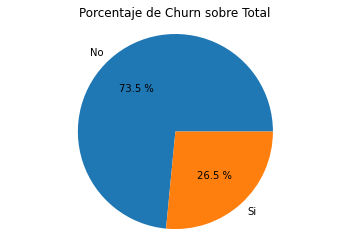

In [28]:
porcentaje_churn = [porcentaje_no,porcentaje_si]
nombres = ["No","Si"]
plt.pie(porcentaje_churn, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.title("Porcentaje de Churn sobre Total")
plt.show()

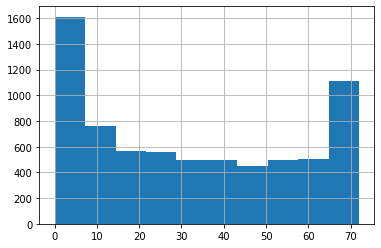

In [29]:
customer_churn_transformado['tenure'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe68f778e10>,
      dtype=object)

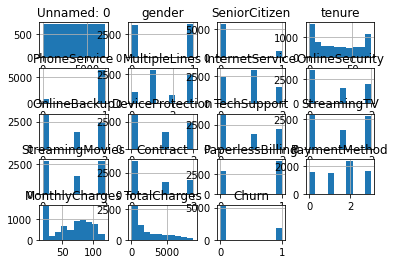

In [30]:
customer_churn_transformado.hist()

Correlaciones de Columnas Transformadas

In [31]:
correlacion = customer_churn_transformado[['gender','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn', 'MonthlyCharges', 'TotalCharges']].corr()['Churn'][:]
correlacion

gender             -0.008376
PhoneService        0.011867
MultipleLines       0.026570
InternetService    -0.047341
OnlineSecurity     -0.289166
OnlineBackup       -0.195335
DeviceProtection   -0.177939
TechSupport        -0.282346
StreamingTV        -0.036328
StreamingMovies    -0.038238
Contract           -0.396614
PaperlessBilling    0.192168
PaymentMethod       0.107448
Churn               1.000000
MonthlyCharges      0.193356
TotalCharges       -0.199318
Name: Churn, dtype: float64

In [32]:
correlacion[correlacion > 0.1]

PaperlessBilling    0.192168
PaymentMethod       0.107448
Churn               1.000000
MonthlyCharges      0.193356
Name: Churn, dtype: float64

In [33]:
correlacion[correlacion < -0.1]

OnlineSecurity     -0.289166
OnlineBackup       -0.195335
DeviceProtection   -0.177939
TechSupport        -0.282346
Contract           -0.396614
TotalCharges       -0.199318
Name: Churn, dtype: float64

¿Es relevante el género para el abandono?

In [34]:
customer_churn_transformado[['gender', 'Churn']].corr()['Churn'][0]

-0.008375817004311456

In [35]:
cross_gender = pd.crosstab(customer_churn.Churn, customer_churn.gender)
cross_gender

gender,Female,Male
Churn,,
No,2549,2625
Yes,938,930


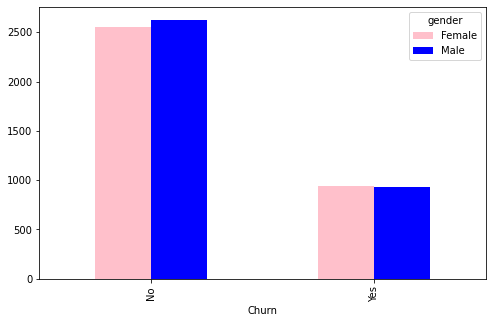

In [36]:
cross_gender.plot.bar(color=('pink','blue'), figsize=(8,5))
plt.show()

Por genero no hay diferencias en la distribucion y la correlación es baja, por lo tanto no es relevante

¿Si es un senior *citizen*?

In [37]:
customer_churn_transformado[['SeniorCitizen', 'Churn']].corr()['Churn'][0]

0.15102503113891472

In [38]:
covariance_1 = np.cov(customer_churn_transformado['SeniorCitizen'], customer_churn_transformado['Churn'])
covariance_1

array([[0.13589008, 0.02457985],
       [0.02457985, 0.19492742]])

In [40]:
cross_senior = pd.crosstab(customer_churn.Churn, customer_churn.SeniorCitizen)
cross_senior

SeniorCitizen,0,1
Churn,,
No,4508,666
Yes,1392,476


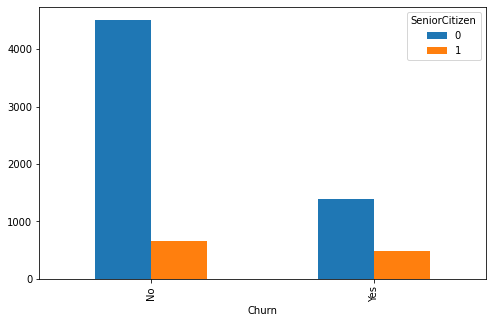

In [41]:
cross_senior.plot.bar(figsize=(8,5))
plt.show()

Hay una correlacion entre personas que son seniorcitizen y el ratio de churn

¿El método de pago?

In [42]:
customer_churn_transformado[['PaymentMethod', 'Churn']].corr()['Churn'][0]

0.10744797989340266

In [43]:
cross_payment = pd.crosstab(customer_churn.Churn, customer_churn.PaymentMethod)
cross_payment

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1286,1290,1294,1304
Yes,257,232,1071,308


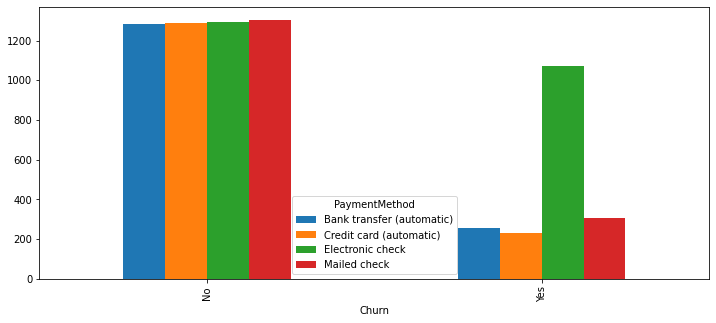

In [44]:
cross_payment.plot.bar(figsize=(12,5))
plt.show()

El 'Electronic check' esta mucho mas presente en los casos de Churn

¿El tipo de contrato?

In [45]:
customer_churn_transformado[['Contract', 'Churn']].corr()['Churn'][0]

-0.3966142252088899

In [46]:
cross_contract = pd.crosstab(customer_churn.Churn, customer_churn.Contract)
cross_contract

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1654,166,48


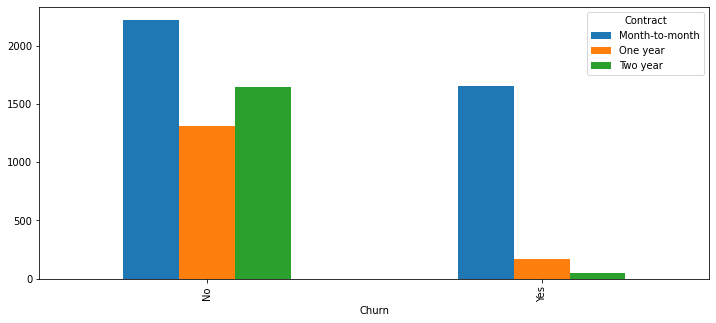

In [47]:
cross_contract.plot.bar(figsize=(12,5))
plt.show()

Los contratos de tipo Mes a Mes inciden mucho mas en Churn

In [48]:
covariance_2 = np.cov(customer_churn_transformado['PaymentMethod'], customer_churn_transformado['Churn'])
covariance_2

array([[1.14065613, 0.05066547],
       [0.05066547, 0.19492742]])

In [49]:
corr, _ = pearsonr(customer_churn_transformado['SeniorCitizen'], customer_churn_transformado['Churn'])
print('Correlacion de Pearson: %.3f' % corr)

Correlacion de Pearson: 0.151


In [50]:
corr, _ = pearsonr(customer_churn_transformado['PaymentMethod'], customer_churn_transformado['Churn'])
print('Correlacion de Pearson: %.3f' % corr)

Correlacion de Pearson: 0.107
